<a href="https://colab.research.google.com/github/ronan777/Scripts-/blob/master/GetH11_wave_and_spect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install obspy

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



Number of traces: 6 Trace(s) in Stream:
IM.H11S1..EDH | 2024-02-19T21:00:00.002000Z - 2024-02-19T22:35:29.998000Z | 250.0 Hz, 1432500 samples
IM.H11S1..EDH | 2024-02-19T22:35:30.003000Z - 2024-02-19T22:59:59.999000Z | 250.0 Hz, 367500 samples
IM.H11S2..EDH | 2024-02-19T21:00:00.002000Z - 2024-02-19T22:35:29.998000Z | 250.0 Hz, 1432500 samples
IM.H11S2..EDH | 2024-02-19T22:35:30.003000Z - 2024-02-19T22:59:59.999000Z | 250.0 Hz, 367500 samples
IM.H11S3..EDH | 2024-02-19T21:00:00.002000Z - 2024-02-19T22:35:29.998000Z | 250.0 Hz, 1432500 samples
IM.H11S3..EDH | 2024-02-19T22:35:30.003000Z - 2024-02-19T22:59:59.999000Z | 250.0 Hz, 367500 samples 

Number of spectrograms: 6 



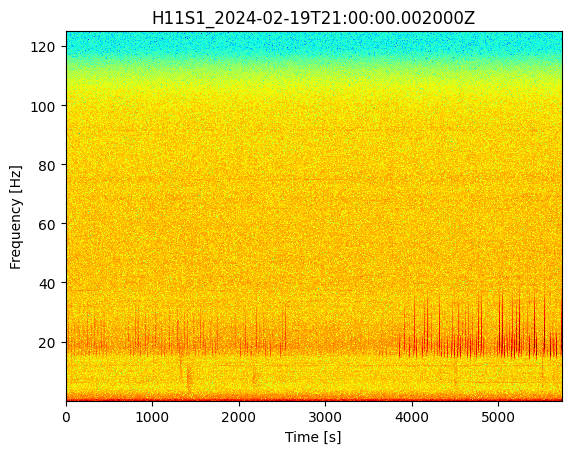

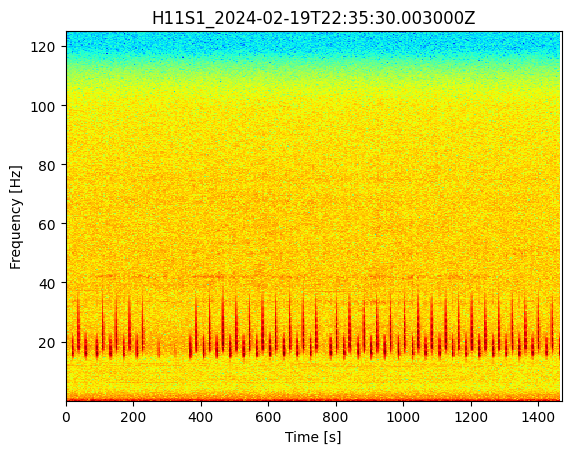

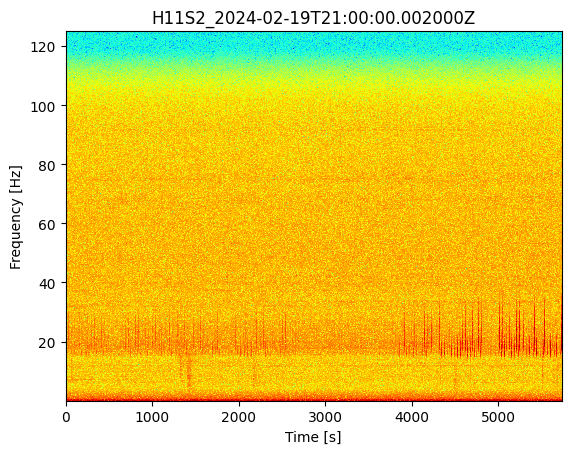

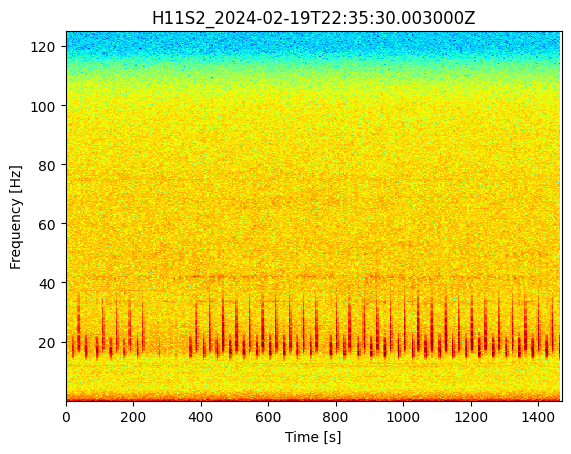

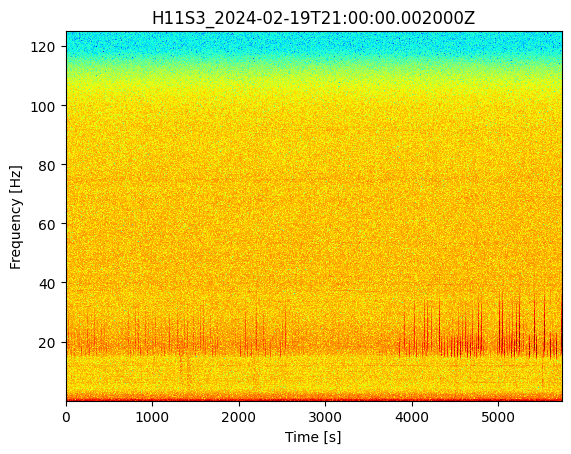

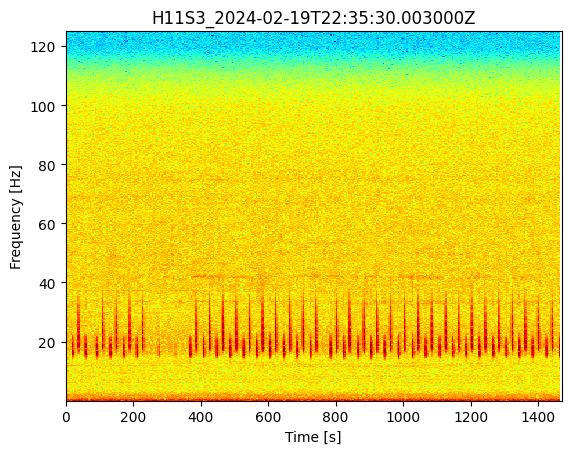

In [2]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np
import math


#starttime=UTCDateTime.utcnow()
starttime=UTCDateTime("2024-02-19 21:00:00") #earthquake southern east Pacific Rise
#
# Get epoch time from UTCDateTime
#
#
# Get two hours of data
#
#endtime=starttime+day_length
endtime=starttime + 7200
client = Client("IRIS")
#client = Client(base_url='https://fdsnws.raspberryshakedata.com/')
waveform0 = client.get_waveforms("IM","H11S*","*","EDH",starttime,endtime, attach_response=True)

n = str(waveform0)
print('Number of traces:',n,"\n")
startplot=starttime
fname='H11'+ str(waveform0[0].stats.starttime)
#waveform0.remove_response(output="VEL")
#waveform0.filter("bandpass",freqmin=0.01,freqmax=.1,corners=3)
waveform0.plot(starttime=startplot,outfile=fname+'_0.png')
k=0
N=len(waveform0)
print('Number of spectrograms:',N,"\n")
while k<N :
  spectplot = str(waveform0[k].stats.station) + '_' + str(waveform0[k].stats.starttime)
  filespect=str(spectplot+'.png')
  fileseed=str(spectplot+'.mseed')
  waveform0[k].spectrogram(title=spectplot,wlen=10,dbscale=True,per_lap=0.5,cmap='jet',outfile=filespect,fmt='png')
  waveform0[k].write(fileseed,format='MSEED')
  k+=1